## Figure 1 Plotting Code

### Left Y-axis: Eruption Rate (Counted by volume per gyr)
Right Y-axis: Mare Age-Frequency (330 units in total, reproducing Fig.18 of Hiesinger et al., 2011) 
Annotation: there are only 328 units shown in the figure actually 

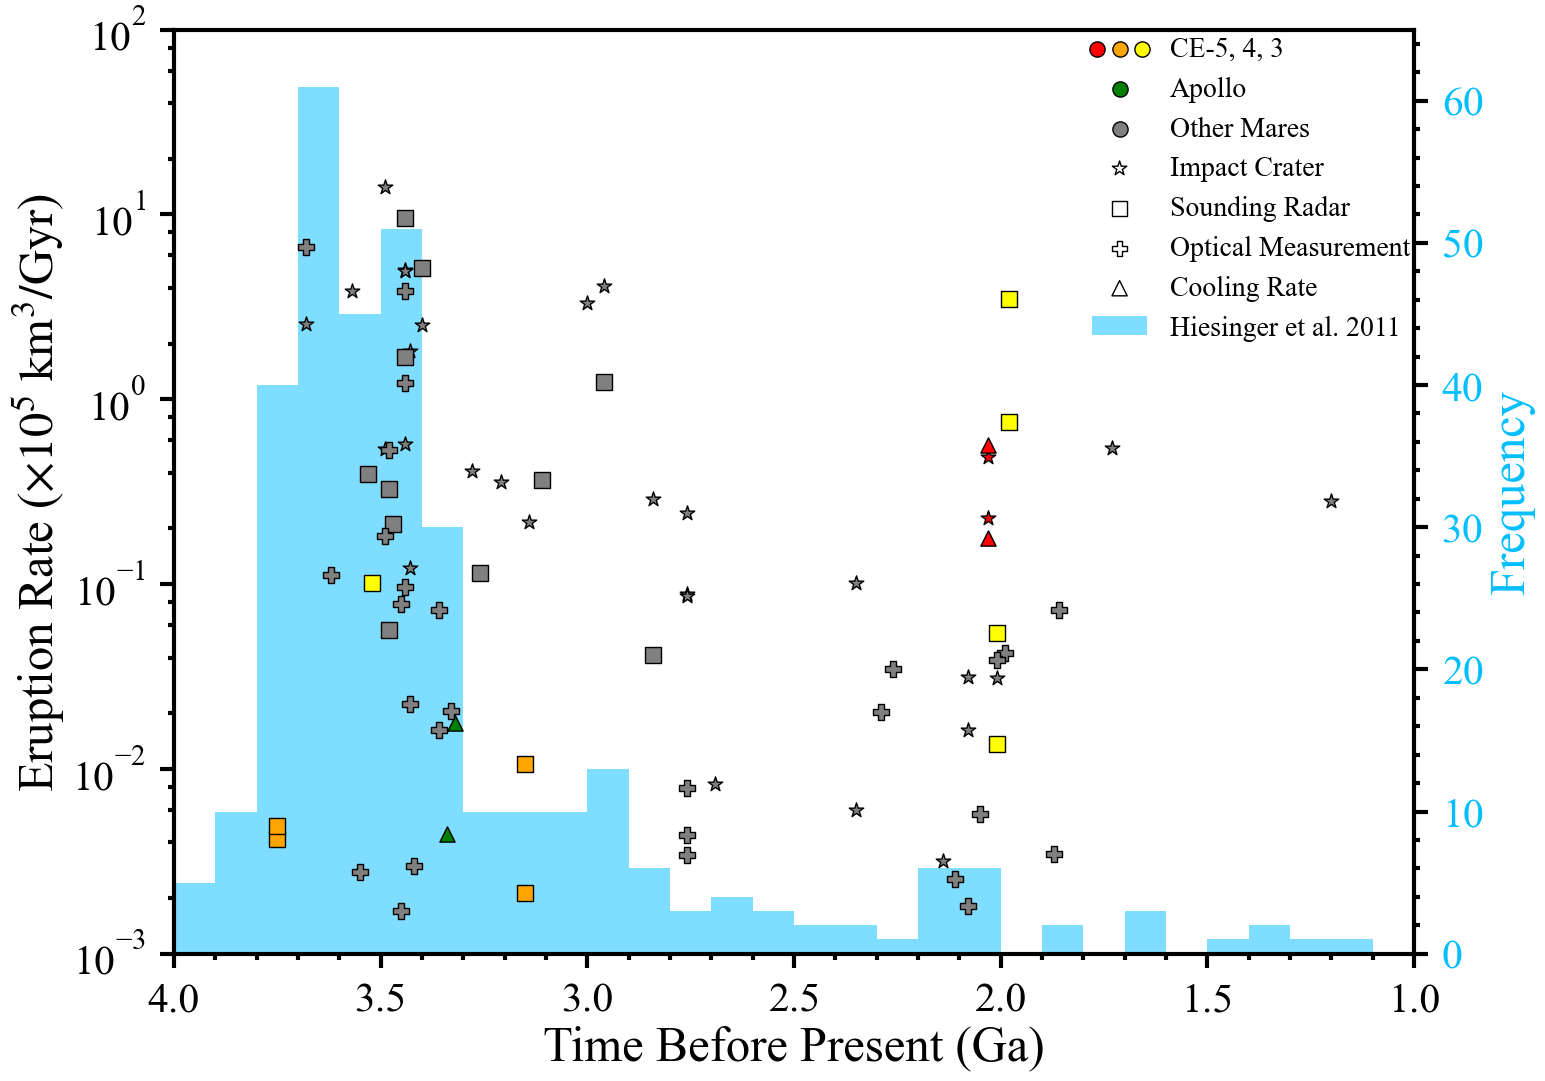

In [8]:
import pandas as PD
from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as PLT
import matplotlib.ticker as TICK
import numpy as NP

## Read the Excel file into a pandas DataFrame
df = PD.read_excel("Dataset1_Compilation_Eruption_Rates.xlsx.xlsx")

# Extract the required columns
x_data = df["Model age (Ga)"]
y_data = df["Eruption Rate (10^5 km^3/Gyr)"]

## Define a dictionary to map mare belonging values to markers
marker_map = {
    "Impact Crater Investigation": "*",  # stars
    "Subsurface Sounding Radar": "s",         # squares
    "Optical Measurement": "P",             # plus ##
    "Cooling Rate Model": "^"          # triangles ##"d"--diamonds; "X"--cross
}

color_map = {
    "CE-5": "red",
    "CE-4":"orange",
    "CE-3":"yellow",
    "Ap-12":"green",
    "Ap-15":"green",
    "Oceanus Procellarum": "grey",  
    "Serenitatis": "grey",         
    "Imbrium": "grey",           
    "Humorum": "grey",           
    "Tranquillitatis": "grey",   
    "Insularum": "grey",
    "Vaporum":"grey",
    "Nubium":"grey"        
}

#------------------#
#Plot Configuration#
#------------------#
PLT.rcParams['font.family'] = 'serif' ##rc: runtime configuration
PLT.rcParams['font.serif'] = ['Times New Roman']
PLT.rcParams['mathtext.fontset'] = 'stix' ##Times-like font used in mathtext    
ticksize_ax = 30
labelsize_ax = 35
linewidth_ax = 2.5
markersize_ax = 120
borderwidth_ax = 3
textsize_ax = 30
legendsize_ax = 20
## Create a figure and axis object
fig, ax = PLT.subplots(figsize=(16, 12))
for i in range(len(df)):
    ax.scatter(x_data[i], 
               y_data[i], 
                marker=marker_map[df["Thickness Method"][i]], 
                facecolor=color_map[df["Mare Belonging"][i]], 
                edgecolors='black',
                s=markersize_ax)
    
CE5 = ax.scatter([],[],facecolor='red',edgecolor='black',marker='o',s=markersize_ax,label='CE-5')
CE4 = ax.scatter([],[],facecolor='orange',edgecolor='black',marker='o',s=markersize_ax,label='CE-4')
CE3 = ax.scatter([],[],facecolor='yellow',edgecolor='black',marker='o',s=markersize_ax,label='CE-3')
Apollo = ax.scatter([],[],facecolor='green',edgecolor='black',marker='o',s=markersize_ax,label='Apollo')
OtherMare = ax.scatter([],[],facecolor='grey',edgecolor='black',marker='o',s=markersize_ax,label='Other Mares')
ImpactCrater = ax.scatter([],[],facecolor='none',edgecolor='black',marker='*',s=markersize_ax,label='Impact Crater')
SoundingRadar = ax.scatter([],[],facecolor='none',edgecolor='black',marker='s',s=markersize_ax,label='Sounding Radar')
Optical = ax.scatter([],[],facecolor='none',edgecolor='black',marker='P',s=markersize_ax,label='Optical Measurement')
Cooling = ax.scatter([],[],facecolor='none',edgecolor='black',marker='^',s=markersize_ax,label='Cooling Rate')

#------------------------------#
#Universal Figure configuration#
#------------------------------#
ax.set_xlim(4.0,1.0) 
ax.set_yscale('log')
ax.set_ylim(0.001, 100)
ax.xaxis.set_major_locator(TICK.MultipleLocator(base=0.5))
ax.xaxis.set_minor_locator(TICK.MultipleLocator(base=0.1))
ax.yaxis.set_major_locator(TICK.LogLocator(base=10,numticks =11))
ax.yaxis.set_minor_locator(TICK.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks =11))
ax.tick_params(axis='both', direction='out', length=10,
               labelsize=ticksize_ax, labelcolor='black', 
               pad=10, which='both', width=borderwidth_ax)
ax.tick_params(axis='both', direction='out', length=4,
               labelsize=ticksize_ax, labelcolor='black', 
               pad=10, which='minor', width=borderwidth_ax)

## right y axis, reproducing the histogram from Fig 18 in Hiesinger et al., 2011
path_dataHiesinger = ("Histogram_Figure18_330number_Hiesinger2011.csv")
data_Hiesinger = PD.read_csv(path_dataHiesinger)
# Sort the data by 'Mid-age Point' in ascending order
data_Hiesinger_resorted = data_Hiesinger.sort_values(by='Mid-age Point')
ages = []
for index, row in data_Hiesinger_resorted.iterrows():
    ages.extend([row['Mid-age Point']] * int(row['Frequency']))

color_ax3 = 'deepskyblue' ##
ax3 = ax.twinx()
n, bins, patches, = ax3.hist(ages, bins=NP.arange(0.9, 4.1, 0.1), color=color_ax3, alpha=0.5)

ax3.set_ylim(0, 65)
ax3.yaxis.set_major_locator(TICK.MultipleLocator(base=10))
ax3.yaxis.set_minor_locator(TICK.MultipleLocator(base=2))
ax3.tick_params(axis='both', direction='out', length=10,
               labelsize=ticksize_ax, labelcolor=color_ax3, 
               pad=10, which='both', width=borderwidth_ax)
ax3.tick_params(axis='both', direction='out', length=4,
               labelsize=ticksize_ax, labelcolor='none', 
               pad=10, which='minor', width=borderwidth_ax)
ax3.set_ylabel("Frequency", fontsize=labelsize_ax, color=color_ax3)
#overall setting#
for border in ['top', 'bottom', 'left', 'right']:
    ax.spines[border].set_linewidth(borderwidth_ax)
ax.set_zorder(ax3.get_zorder()+1)
ax.patch.set_visible(False)
ax.set_xlabel("Time Before Present (Ga)", fontsize=labelsize_ax)
ax.set_ylabel(r"Eruption Rate ($\times 10^5$ $\mathrm{km^3/Gyr}$)", fontsize=labelsize_ax)

#Legend Setting#
handles = [(CE5, CE4, CE3), Apollo, OtherMare, 
           ImpactCrater, SoundingRadar, Optical, Cooling, patches]
labels = ['CE-5, 4, 3', 'Apollo', 'Other Mares', 
          'Impact Crater', 'Sounding Radar', 'Optical Measurement', 'Cooling Rate', 'Hiesinger et al. 2011']
fig.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)}, 
           loc='upper left', bbox_to_anchor=(0.72,1.02),bbox_transform=ax.transAxes,
           edgecolor='none',facecolor='none',fontsize=legendsize_ax)

#fig.savefig("Fig1_EruptionVariation.jpg", bbox_inches='tight', transparent=True)
fig.savefig("SubfFig_EruptionVariation.pdf", bbox_inches='tight', transparent=True)
PLT.show()

In [ ]:
import os
import re
import matplotlib.pyplot as PLT
import matplotlib.ticker as TICK
import pandas as PD
from scipy.signal import savgol_filter as SGF

# Directory containing the data files
file_path = "Dataset2_Evolution_Temperature_Contrast_ThermochemicalModel.csv"
# Read the CSV file
df = PD.read_csv(file_path)
Time = df['Time'] * 1000
DeltaT = df['DeltaT']
DeltaT_smoothed = SGF(DeltaT, window_length=11, polyorder=2)

#------------------#
#Plot Configuration#
#------------------#
PLT.rcParams['font.family'] = 'serif' ##rc: runtime configuration
PLT.rcParams['font.serif'] = ['Times New Roman']
PLT.rcParams['mathtext.fontset'] = 'stix' ##Times-like font used in mathtext    
ticksize_ax = 30
labelsize_ax = 35
linewidth_ax = 2.5
borderwidth_ax = 3
textsize_ax = 30
legendsize_ax = 25

#First Figure: Temperature Evolution#
fig,ax =PLT.subplots(figsize=(16,4))
##ax.plot(Time, DeltaT, linewidth=linewidth_ax, color='red', linestyle='-')
ax.plot(Time, DeltaT_smoothed, linewidth=linewidth_ax, color='blue', linestyle='-')

ax.set_xlim(4000, 1000)
ax.set_ylim(100, 600)
ax.xaxis.set_major_locator(TICK.MultipleLocator(base=500))
ax.xaxis.set_minor_locator(TICK.MultipleLocator(base=100))
ax.yaxis.set_major_locator(TICK.MultipleLocator(base=100))
ax.yaxis.set_minor_locator(TICK.MultipleLocator(base=20))

ax.set_ylabel(r"$\Delta T$ (°C)",fontsize=labelsize_ax) 
##ax.set_ylabel(r"$T_{\mathrm{MIC}} - T_{\mathrm{mantle}}$(°C)",fontsize=labelsize_ax) 
ax.tick_params(axis='y',direction='in',length=10,labelsize=ticksize_ax,pad=10,which='both',width=borderwidth_ax)
ax.tick_params(axis='y',direction='in',length=0,labelsize=ticksize_ax,which='minor',width=borderwidth_ax)
ax.tick_params(axis='x',direction='in',length=10,labelsize=ticksize_ax,pad=10,which='both',width=borderwidth_ax,labelcolor='none')
ax.tick_params(axis='x',direction='in',length=4,labelsize=ticksize_ax,which='minor',width=borderwidth_ax)

## overall setting
for border in ['top', 'bottom', 'left', 'right']:
    ax.spines[border].set_linewidth(borderwidth_ax)

# Hide the top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

PLT.tight_layout()
PLT.show()
fig.savefig(f"Subfigure_Thermochemical_TempContrast_Evolution.eps",bbox_inches='tight',dpi=300,transparent=True) 
# Close the plot to free up memory
PLT.close()
